#### Machine Learning 1st Assignment
#### Maximiliano Franco Martin & Anup Satyal

This assignment focuses on applying the Feature Engineering processes and the Evaluation methods that we have learned in previous sessions to solve a practical scenario: Predict the price of houses.
In particular, we are going to use the experimental scenario proposed by the House Prices Dataset. This dataset includes 79 explanatory variables of residential homes. For more details on the dataset and the competition see <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>.

This dataset is close to the kind of data that you will find in the real world: it is not clean, it might include repeated, correlated or uninformative features, it has null or wrong values... 
Even though this is still far from the kind of messy database that you will find in a real company, it is a good starting point to realize the magnitude of the problem. Therefore, the first step is to visualize and analyze the dataset in order to understand the information that we have. Then, you have to clean the dataset to solve the problems it might present.

Once we have the dataset cleaned, we can start the feature engineering process itself to select the most representative feature set to feed the regression models. Previously to this step, you can create new features or modify the ones already in the dataset. This step typically involves some knowledge domain about the particular scenario of the problem, either because you are an expert on the field or because you have access to people with this knowledge (i.e., the project owner, the business expert in your company,...). Although, I imagine you are not a real-estate expert, there are some sensible procedures or general domain knowledge that you can apply. Moreover, the competition provides a file (`data_description.txt`) that provides an explanation of each of the features that you may find useful for the cleaning and feature engineering process (i.e., this will be the business expert you could have at your company, explaining the data and the related aspects to you). Finally, you also have a lot of kernels at your disposal in the competition webpage to take ideas from. Be creative!


## What is my goal?
- I want to predict predict the final price of each home (Therefore, this is a regression task).
- I have to clean the dataset to allow its further processing.
- I have to use the feature engineering techniques explained in class to transform the dataset: filtering, wrapper and embedded methods.
- I have to properly apply the evaluation methods and ideas (train, validation, test splitting; cross-validation, chose the proper metric, ..) to understand the real performance of the proposed models, making sure that they will generalize to unseen data (test set).

In [1]:
# Data Reading and preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# The dataset is offered in two separated fields, one for the training and another one for the test set. 

folder_path = '~/Google Drive/TERM 2/MLII/MLII_Assignment_1/'

training_data = pd.read_csv(os.path.join(folder_path, 'train.csv'), index_col = 'Id')
print(training_data.shape)

test_data = pd.read_csv(os.path.join(folder_path, 'test.csv'), index_col = 'Id')
print(test_data.shape)

(1460, 80)
(1459, 79)


To avoid applying the Feature Engineering process two times (once for training and once for test), you can just join both datasets (using the `concat` function), apply your FE and then split the datasets again. However, if we try to do join the two dataframes as they are, we will get an error because they do not have the same columns: `test_data` does not have a column `SalePrice`. Therefore, we first create this column in the test set and then we join the data

In [3]:
test_data['SalePrice'] = 0  #create SalePrice column

dataset = pd.concat([training_data, test_data], axis = 0)  #concat the rows
print(dataset.shape) #final shape of dataset

(2919, 80)


In [4]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's now visualize the dataset to see where to begin

In [5]:
dataset.info()  #general info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

We can see some problems just by taking a look to the summary: the dataset has missing values, there are some categorical columns codified as numeric, it has different scales for the feature values. In addition, I will recommend you to take a deeper look to the data to detect more subtle issues: correlation between features, skewness in the feature values...


In [6]:
correlation_matrix  = dataset.corr() #correlations

In [7]:
correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1,-0.42,-0.2,0.034,-0.066,0.034,0.043,0.0054,-0.064,-0.073,-0.13,-0.22,-0.25,0.31,0.026,0.072,0.0099,-0.0019,0.14,0.18,-0.0088,0.26,0.041,-0.055,0.088,-0.047,-0.1,-0.018,-0.016,-0.021,-0.038,-0.049,-0.0031,-0.029,-0.0012,-0.015,-0.036
LotFrontage,-0.42,1,0.49,0.22,-0.076,0.12,0.092,0.22,0.22,0.047,0.11,0.35,0.46,0.027,0.0049,0.38,0.11,-0.026,0.18,0.039,0.23,0.0047,0.35,0.26,0.077,0.31,0.36,0.12,0.16,0.012,0.028,0.076,0.17,0.044,0.011,-0.0079,0.17
LotArea,-0.2,0.49,1,0.1,-0.036,0.024,0.022,0.13,0.19,0.084,0.021,0.25,0.33,0.032,0.00055,0.28,0.13,0.026,0.13,0.034,0.13,-0.021,0.21,0.26,-0.0086,0.18,0.21,0.16,0.1,0.021,0.016,0.054,0.094,0.069,0.0042,-0.024,0.16


**High correlation between some variables**

In [8]:
dataset.describe().T  #summary statistics

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


We see that there are quite a few variables with zero median and high means (and high STD). Data is not skewed, which needs to be taken into account during the feature selection and modeling phases.

# Data Cleaning

The definition of "meaningless" depends on your data and your intuition. A feature can lack any importance because you know for sure that it does not going to have any impact in the final prediction (e.g., the ID of the house). In addition, there are features that could be relevant but present wrong, empty or incomplete values (this is typical when there has been a problem in the data gathering process). For example, the feature `Utilities` present a unique value, consequently it is not going to offer any advantage for prediction.

We remove meaningless features and incomplete cases.

In [9]:
dataset = dataset.drop('Utilities', axis = 1)  # drop Utilities as asked

In [10]:
dataset.nunique()  # check for unique values. If there was only 1 unique value, it might suggest that the variable is meaningless.

MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
Street              2
Alley               2
LotShape            4
LandContour         4
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        444
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       14
Functional          7
Fireplaces          5
FireplaceQu         5
GarageType          6
GarageYrBlt       103
GarageFinish        3
GarageCars          6
GarageArea        603
GarageQual          5
GarageCond          5
PavedDrive

## Hunting NAs



Our dataset is filled with missing values, therefore, before we can build any predictive model we'll clean our data by filling in all NA's with more appropriate values.
As another option, we could just remove the entries with null values (i.e., remove rows). However, in this situation (and in many other that you will face) this is out of the question: we have to provide a prediction for each and every one of the houses (required by the competition). 
Similarly, you could discard the features with null values (i.e., remove columns), but it would mean the removal of many features (and the information they provide).

As a rule of thumb, if you are allowed to discard some of your data and you do not have many null values (or you do not have a clear idea of how to impute them) you can safely delete them. If this is not the case, you must find a way to impute them (either by applying some knowledge of the addressed domain or by using some more advanced imputation method: https://topepo.github.io/caret/pre-processing.html#imputation)

Counting columns with null values

How to clean up NAs, assign them default values, and assign features the correct type? You can write long pieces of code, use an external tool that will do most of the job for you (Dataiku?) or you can use the "Import Dataset" function in RStudio. Avoid using fancy external packages to import data, and rely on the most common ones ('pandas' in Python, or 'base' or 'readr' in R).

In any case, what we do here, is simply go through every single **factor** feature to: extend the number of possible levels to the new default for NAs (`None` or  `No` for categorical features or any other default value described in the documentation). For numerical values, we can just change the NA value for a default value, the median of the other values or some other value that you can infer (i.e., for the null values in the `GarageYrBlt` column you could use the year the house was built as a replacement value).

In [11]:
# we checked if any of the target variable in the TRAINING set was 0. These rows could be immediately removed. 

(dataset.iloc[0:1460, 78] == 0).sum()

0

In [12]:
# LotFrontage : NA most likely means no lot frontage but since the description document does not confirm this, we decided to impute the Median instead. Esentially
# what we are saying is that houses have a "standard" LotFrontage.

dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

Our approach to cleaning up NULL values was to check if there were rows (or columns) that had over 80% NULL values i.e 60/80 columns had NULL values. If 80% of the values were NULL, these rows would be meaningless to learn from. If 80% of a column was NULL, imputing values would also be difficult.

In [13]:
# check to see if there are rows with more than 60 NULL values. If not, there is no point in deleting them

(dataset.isnull().sum(axis = 1) > 60).sum()

0

In [14]:
dataset.loc[:,dataset.isnull().sum() > 0.8 * dataset.index.size].columns # those columns that have over 80% null values. 

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

Once we know which rows/columns have the majority of NULLS, we start our imputing process from those columns based on information available in the description file. 

In [15]:
# Filling the missing values in categorical columns. Almost all of the NULLs were described as NO_X in the data description file. 

dataset['Alley'] = dataset['Alley'].fillna('No')  # Doesn't have an alley
dataset['PoolQC'] = dataset['PoolQC'].fillna('NP')  # Doesn't have a pool
dataset['Fence'] = dataset['Fence'].fillna('NF')  # Doesn't have a Fence
dataset['MiscFeature'].fillna(0, inplace = True)  # No feature == 0
dataset['MiscFeature'].where(dataset['MiscFeature'].isnull(),1,inplace = True)  #has a feature ==1
dataset['BsmtQual'] = dataset['BsmtQual'].fillna('NB') # Doesn't have a basement 
dataset['BsmtCond'] = dataset['BsmtCond'].fillna('NB') # Doesn't have a basement
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna('NB') # Doesn't have a basement
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna('NB') # Doesn't have a basement
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna('NB') # Doesn't have a basement
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('NF') # Doesn't have a fireplace
dataset['MasVnrType'].fillna('CBlock',inplace =  True)  #Cinder Block is the only missing category from the description
dataset['GarageType'] = dataset['GarageType'].fillna('NG')  # Doesn't have a garage 
dataset['GarageFinish'] = dataset['GarageFinish'].fillna('NG')  #Doesn't have a garage  
dataset['CentralAir'].where(dataset['CentralAir'] == 'Y',0,inplace = True) ## where value N, change to 0
dataset['CentralAir'].where(dataset['CentralAir'] == 'N',1,inplace = True) ## where it is Y change to 1

In [16]:
# Once the imputing was done, if there were still columns with over 80% NULL values, the following loop would delete those columns  

for columns in dataset:
    if dataset[columns].isnull().sum() > 0.8 * dataset.index.size:
        dataset = dataset.drop(columns, axis = 1)

In [17]:
dataset.isnull().sum()[dataset.isnull().sum() > 0]  

MSZoning          4
Exterior1st       1
Exterior2nd       1
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt     159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
SaleType          1
dtype: int64

We did one last check to see how many null values remain and in which column. In the case of some of the columns (Exterior1st), there is only 1 row that still has a NULL value. In the case that this NULL is in the training set, we would remove the row. If it were in the test set, we would have to devise some form of an imputation strategy. The imputation will be a bit more complicated for a column with many NULL values (GarageYrBuilt). However, if we decide not to use GarageYr as a feature, we would not have to make any imputations. These will be dealt for in the feature creation and removal section below.

## Feature Removal

We checked to see if the basement areas that were used and unused would total to the total basement area. We realised that in 99% of the cases this was true. There was also a realative high correlation between total basement size and bsmtfinSF1 and BsmtUnfSF. By keeping only the total basement area, we were able to reduce 3 columns. 

In [18]:
# In 99% of the cases, the sum of basement fin1 and fin2 and unsused = total BSMT SF the same so we remove the three previous ones

((dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'] + dataset['BsmtUnfSF'] == dataset['TotalBsmtSF']).sum()) / dataset.index.size  
dataset = dataset.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis = 1)

Checking correlations, we also realised that there were ther higly correlated variables. Based on business judgement, we removed one of the variables that was highly correlated.

In [19]:
# remove columns that are highly correlated

dataset = dataset.drop(['GarageYrBlt','GarageCars'], axis = 1)  # >80% correlation with year built
dataset = dataset.drop(['BedroomAbvGr'], axis = 1)  # ~67% #correlation to total rooms abv ground
dataset = dataset.drop(['1stFlrSF','2ndFlrSF'], axis = 1)   # correlated to living area above ground

Initially, we thought the miscellaneous feature might be an important feature. When we checked what the average value of the misellanous features, given the mean/median, and number of houses that have miscellaneous features, we decided to drop the column from our modelling. 

In [20]:
 dataset[dataset['MiscVal']!= 0]['MiscVal'].describe() 

count      103.000000
mean      1440.398058
std       2681.231040
min         54.000000
25%        450.000000
50%        600.000000
75%       1200.000000
max      17000.000000
Name: MiscVal, dtype: float64

In [21]:
dataset[dataset['MiscVal']!= 0]['MiscVal'].count()

103

In [22]:
dataset = dataset.drop(['MiscVal'], axis =1 )

We then carried out checks to see if some categorical columns that seem to represent the same information actually have the same information in two columns. In the case that 80% of the values were same in both columns, we removed one of them. This helps us reduce 2 more columns.

In [23]:
((dataset['Exterior1st'] == dataset['Exterior2nd']).sum()) / dataset.index.size ## >80% the same so we remove
((dataset['Condition1'] == dataset['Condition2']).sum()) / dataset.index.size  ## >80% the same so we remove
((dataset['ExterQual'] == dataset['ExterCond']).sum()) / dataset.index.size  ## <80% the same so we don't remove
((dataset['BsmtCond'] == dataset['BsmtQual']).sum())/ dataset.index.size  ## <80% the same so we don't remove


dataset = dataset.drop(['Exterior2nd', 'Condition2'], axis = 1)

Finally, we checked the variablity of information available in our dataset. In the case that over 80% of the rows had one categorical value in a particular column even though there were other possibilties, we removed those columns (since most of the dataset will have the same categorical value, it shouldn't contibute to variability). In some cases we also removed a column because in our opinion, they did not make proper business sense or because we believed the information contained in these columns had already been reflected by another column.

In [24]:
# categorical removed because they don't make any business sense

dataset = dataset.drop(['SaleType','SaleCondition'], axis = 1)  # this is realted to the buyer rather than the price
dataset = dataset.drop(['MSSubClass'], axis = 1)  #this has two variables included in one, would be difficult to give the coefficient
dataset = dataset.drop(['LotShape'], axis = 1) #beauty is in the eye of the beholder
dataset = dataset.drop(['LandContour','LandSlope'], axis = 1) #>80% of the dataset is flat and/or with gentle slope. There won't be much variablity
dataset = dataset.drop(['RoofStyle','RoofMatl'], axis = 1) #>80% of the dataset has the same roof style and material so they won't grab much variability
dataset = dataset.drop(['BsmtCond'], axis = 1) #>80% of the dataset has the same typical style basement so it won't capture much volatility
dataset = dataset.drop(['Heating'], axis = 1) #>95% of the dataset has the same heating style basement so it won't capture much volatility
dataset = dataset.drop(['Electrical'], axis = 1) #>80% of the dataset has the same electrical situation so it won't capture much volatility
dataset = dataset.drop(['Functional'], axis =1) #>90% of the dataset has the same typical functionality so it won't capture much volatility
dataset = dataset.drop(['Fireplaces','FireplaceQu'], axis = 1) #the heating situation captured in heating quality
dataset = dataset.drop(['GarageQual','GarageCond'], axis = 1) #>80% of the dataset have the same typical quality and condition
dataset = dataset.drop(['PavedDrive'],axis = 1) #>90% of the dataset have paved so it won't capture much volatility
dataset = dataset.drop(['PoolQC'],axis = 1) #>95% of the dataset have no pool so it won't capture much volatility 
dataset = dataset.drop(['Fence'],axis = 1) #>80% of the dataset have no fence so it won't capture much volatility 
dataset = dataset.drop(['MiscFeature'],axis = 1) #>80% of the dataset have no MiscFeatures so it won't capture much volatility
dataset = dataset.drop(['MasVnrType'], axis = 1)  #since the mas veneer area is continuous, we thought it is better for the Linear Model and that this information is redundant  

With the feature removal process, we were able to reduce 32 columns.

## Feature Creation

The first feature we decided to create was the used and unused area. Esentially, each house has a Lot Area, which reflects available space. By summing all the areas where there was construction in place, we would get a sense of how much of the available area was already in use and how much was free for the new buyer to build in. In the case that the unused area was negative, it would imply that the property has more than one story. By doing so, we were able to remove 9 columns.

In [25]:
# sum all the areas and calculate that as used area then substract that from the lot to get unsused area
# drop those columns that we used to calculate used and unusued are

dataset['used_area'] = dataset[['TotalBsmtSF','GrLivArea','GarageArea','WoodDeckSF',
                                'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']].sum(axis = 1)

dataset['unused_area'] = dataset['LotArea'] - dataset['used_area']

dataset = dataset.drop(['TotalBsmtSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
                        'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'], axis =  1)  #lot area kept for outlier removal.

The second feature we decided to create was the age of the house. As per the description document, if the house had NOT been remoddled, the remodled year was the year built. As such, we decided to create the feature using the remoddling year. By creating the house_age feature, we were able to reduce a further 3 columns.

In [26]:
# calculate the age of the house (since the remodled date is the same as the built date IF remoddling has not been done).
# remove the rest of the columns

dataset['house_age'] = dataset['YrSold'] - dataset['YearRemodAdd'] 
dataset = dataset.drop(['YrSold', 'YearRemodAdd', 'YearBuilt'],axis =1)

The third feature we decided to create was the ratio of rooms to bathrooms in the house (considering half baths as 0.5 as is commonly used in the industry). Usually one would want a balance between number of rooms and bathrooms in a house. 

In [27]:
# create a new feature called room to bath ratio and remove the remaining columns used to calculate that ratio (half bathroom coded as 0.5)

dataset['room_to_bath'] = dataset['TotRmsAbvGrd'] / (dataset['FullBath'] + (dataset['HalfBath']/2) + dataset['BsmtFullBath'] + dataset['BsmtHalfBath']) ##room to bath ratio 
dataset = dataset.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','TotRmsAbvGrd'], axis = 1)

The last feature we created was a price per square meter calculation. Naturally because this feature uses the target variable, it cannot be used in the modelling. However, creating this feature would help us remove ouliers (by removing those houses with extraordinarity high price per square meter). 

In [28]:
dataset['price_persqm'] = dataset['SalePrice'] / dataset['LotArea']

Once we created the features, we also removed 3 other columns that we believed had information that was now captured by one of the features we had created. 

In [29]:
dataset = dataset.drop(['BsmtFinType1','BsmtFinType2'], axis = 1) #removed because the total basement area has been chosen without separating between the types

dataset = dataset.drop(['MoSold'], axis = 1)  #since year has been taken into account


## Imputation

Now that we had a list of columns that we were going to use for the model, we had to formulate an imputation strategy for the NULL values in those columns. There were 4 columns that needed such imputations. 

In [30]:
# the MSZoning missing values with the mode since it is a categorical value

modeMSZ = dataset['MSZoning'].value_counts().sort_values(ascending = False).keys()[0]

In [31]:
# the Exterior1st missing values with the mode in the same MSZoning and Neighborhood

modeExterior1st =dataset[(dataset['MSZoning'] == 'RL') & (dataset['Neighborhood'] == 'Edwards')]['Exterior1st'].value_counts().keys()[0]

In [32]:
# the MasVnrArea missing values with the median.

medianMVA = dataset['MasVnrArea'].describe().loc['50%',]

In [33]:
# the Kitchen Quality missing values with mode

modeKitchenQ = dataset['KitchenQual'].value_counts().sort_values(ascending = False)[0]

In [34]:
# the room_to_bath missing values with median

medianRoom_to_bathroom = dataset[(dataset['MSZoning'] == 'RL') | (dataset['MSZoning'] == 'RM')]['room_to_bath'].describe().loc['50%',]

In [35]:
# Fill NA's
dataset['MSZoning'] = dataset['MSZoning'].fillna(modeMSZ) 
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(modeExterior1st)
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(medianMVA) 
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(modeKitchenQ)
dataset['room_to_bath'] = dataset['room_to_bath'].fillna(medianRoom_to_bathroom)

In [36]:
# Check to see if there are any NULLS left. 

dataset.isnull().sum()[dataset.isnull().sum() > 0]

Series([], dtype: int64)

## Standarization

Once all the NULL values were removed, given that some of the chosen predictors are categorical while others were continuous (high) numbers, we standarised the variables to reduce skewness. While a log transformation was considered, for some of the variables (unused_area) this would not be possible (-ve unused = more than 1 story). 

In [37]:
# standarise the variables

dataset['LotArea'] = (dataset['LotArea'] - dataset['LotArea'].mean())/ dataset['LotArea'].std()
dataset['LotFrontage'] = (dataset['LotFrontage'] - dataset['LotFrontage'].mean())/ dataset['LotFrontage'].std()
dataset['used_area'] = (dataset['used_area'] - dataset['used_area'].mean())/ dataset['used_area'].std()
dataset['unused_area'] = (dataset['unused_area'] - dataset['unused_area'].mean())/ dataset['unused_area'].std()
dataset['MasVnrArea'] = (dataset['MasVnrArea'] - dataset['MasVnrArea'].mean())/ dataset['MasVnrArea'].std()

## Final Dataset Preparation

Once the features were chosen, NULL values removed and variables standarised, only two steps remained:

a) Convert the categorical variables to dummies

b) Prepare a train (without outliers) and test set

In [38]:
# Loop that runs through the categorical columns, dummying them and removing the single column at the end (so that only categorical columns remain)

for columns in dataset:
    if dataset[columns].dtype == 'O':
                    dataset = dataset.merge(pd.get_dummies(dataset[columns], prefix = 'category'), left_on = 'Id', right_on = 'Id').drop(columns, axis = 1)
            

In [39]:
# Division of dataset into test and train sets. In the case of the train sets, the price per sqm feature that was created earlier was used to keep only those rows which were within 3x z-score.
# Once the outliers were removed, the price_per_sqm column was removed from the trianing set
# A final verification for NULL values was done

from scipy import stats

train_set = dataset.iloc[0:1460,:][(np.abs(stats.zscore(dataset.iloc[0:1460,:]['price_persqm'])) < 3)].drop('price_persqm', axis = 1)
train_set.isnull().sum()[train_set.isnull().sum() > 0]

Series([], dtype: int64)

In [40]:
# Shape check to ensure train and test_set have the same shapes. 

train_set.shape

(1418, 136)

## Modelling

A linear model was chosen as the hypothesis set. To avoid overfitting, a lasso regression with cross validation was chosen as the model type. In addition, a simple hyperparameter optimisation model (Lasso CV) was used to set the correct alpha for the lasso regression. 

**It should be noted that the log of the target variable has been used to train the model. The intereprtation in this case is the % increase in house prices for each unit increase in the independent variables. This has been done so that our model can predict the relative increases in prices rather than absolute, which is more of a reflection of how house prices are normally derived.**

In [41]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

In [42]:
# Split the train set into the independent and target variables
# Convert the variables to 2d numpy arrays (as required by sklearn)

X = train_set.drop('SalePrice', axis = 1).values
y = np.log(train_set['SalePrice']).values

In [43]:
# Set seed and split the dataset with a test_size of 20% and train size of 80%

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [44]:
# Define alpha space to select the best alphas

alpha_space = np.logspace(-4, 0, 50)

In [45]:
# Define a cross validated lasso regression optimisation model that takes all the numbers in the alpha space to find one that minimizes mean squared error. 

lassocv = LassoCV(cv = 10, alphas = alpha_space, normalize = True,max_iter = 1e5)

In [46]:
# Train the lasso CV and find the Alpha that minimises the mean_squared error

lassocv.fit(X_train, y_train)
lassocv.alpha_

0.0001

In [47]:
# Define a Lasso function with the alpha found in the lasso CV model

lasso = Lasso(alpha = lassocv.alpha_, normalize=True)

In [48]:
# Final model is the Lasso regression with the optimised Alpha

model = lasso.fit(X_train, y_train)

In [49]:
# Predict the y for the test set

y_pred = model.predict(X_test)

In [50]:
# Check R2

lasso.score(X_test, y_test)

0.7574005507402813

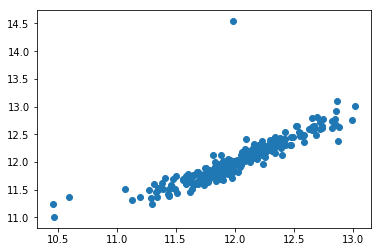

In [51]:
# Simple plot to check the predictions

plt.scatter(y_test, y_pred)

In [52]:
# Check the mean_absolute_error for training

mean_absolute_error(y_test,y_pred)

0.09819058419279215

## Predictions

Once the model had been trained, it was used to predict the house prices on the test_set. The categorical variables were aleady dummied in the main dataset and only the price_persqm (outlier removal during training) and Sale Price (target variable) columns were deleted. 

**Since the log prices were predicted but Kaggle requires an absolute value prediction, the exponential of the predicted prices were taken.**

In [53]:
# specify test set as required
# check shape to verify number of columns matches those in the train set - 1 (target variable)

test_set = dataset.iloc[1460:,:].drop(['price_persqm','SalePrice'], axis = 1)
test_set.shape

(1459, 135)

In [54]:
# predict the house prices and set the column and index as required by kagle
# exp to scale back the predictions to its original form.


df_predictions = pd.DataFrame(np.exp(model.predict(test_set)))
df_predictions.columns = ['SalePrice']
df_predictions.index = test_data.index

In [55]:
# final predictions stored to file. 

df_predictions.to_csv(os.path.join(folder_path, 'predictions_Anup_Max.csv'))

## Kaggle Results

The final predictions were uploaded to Kaggle under the username anupsatyal. Our score is 0.13510, which ranks 2234 on the public leaderboard.